<a href="https://colab.research.google.com/github/KrimssmirK/CCDATS1L_ASSIGNMENT_COM-ML201/blob/main/Aur%C3%A9lien_G%C3%A9ron_ml/Chapter_5_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 8

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [ ]:
y_setosa = (iris["target"] == 0)
y_versicolor = (iris["target"] == 1)

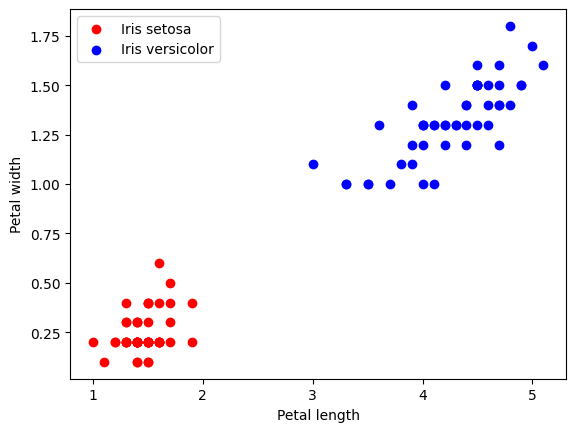

In [ ]:
setosa_petal_length = X[y_setosa][:, 0]
setosa_petal_width = X[y_setosa][:, 1]
versicolor_petal_length = X[y_versicolor][:, 0]
versicolor_petal_width = X[y_versicolor][:, 1]

plt.scatter(setosa_petal_length, setosa_petal_width, c="red", label="Iris setosa")
plt.scatter(versicolor_petal_length, versicolor_petal_width, c="blue", label="Iris versicolor")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

In [ ]:
setosa_or_versicolor = (y == 0) | (y == 1)

In [ ]:
X_prepared = X[setosa_or_versicolor]
y_prepared = y[setosa_or_versicolor]

In [ ]:
# scale
scaler = StandardScaler()
X_prepared = scaler.fit_transform(X_prepared)

# hyperparameters
C = 1
m = len(X_prepared)

# ml algorithms
linear_model = LinearSVC(C=C, loss="hinge")
svc_model = SVC(kernel="linear", C=C)
sgd_model = SGDClassifier(loss="hinge", alpha=1/(m*C))

linear_model.fit(X_prepared, y_prepared)
svc_model.fit(X_prepared, y_prepared)
sgd_model.fit(X_prepared, y_prepared)


SGDClassifier(alpha=0.01)

In [ ]:
def compare_bias_weights(models):
  for model in models:
    print("model:", model)
    print("bias:", model.intercept_)
    print("weights:", model.coef_)
    print()

In [ ]:
compare_bias_weights([linear_model, svc_model, sgd_model])

model: LinearSVC(C=1, loss='hinge')
bias: [0.29588877]
weights: [[1.0607458  1.00177835]]

model: SVC(C=1, kernel='linear')
bias: [0.32182521]
weights: [[1.04342638 0.94747825]]

model: SGDClassifier(alpha=0.01)
bias: [0.25196308]
weights: [[1.05794798 0.99367871]]

